In [3]:
!pip install pandas_datareader

# Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import warnings
warnings.filterwarnings("ignore")

In [5]:
!pip install yfinance


# Import Data

In [6]:
import yfinance as yf

start = '2015-01-01' #Timeframe 
end = '2025-01-03'

df = yf.download('AAPL', start=start, end=end)
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-01-02,24.347168,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05,23.661272,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06,23.663494,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07,23.995319,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08,24.917271,27.972500,28.037500,27.174999,27.307501,237458000


# Descriptive Statistics

In [7]:
df.columns

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [8]:
df.columns = df.columns.droplevel('Ticker')  # Drop the 'Ticker' level
print(df)

Price        Adj Close       Close        High         Low        Open  \
Date                                                                     
2015-01-02   24.347168   27.332500   27.860001   26.837500   27.847500   
2015-01-05   23.661272   26.562500   27.162500   26.352501   27.072500   
2015-01-06   23.663494   26.565001   26.857500   26.157499   26.635000   
2015-01-07   23.995319   26.937500   27.049999   26.674999   26.799999   
2015-01-08   24.917271   27.972500   28.037500   27.174999   27.307501   
...                ...         ...         ...         ...         ...   
2024-12-26  259.019989  259.019989  260.100006  257.630005  258.190002   
2024-12-27  255.589996  255.589996  258.700012  253.059998  257.829987   
2024-12-30  252.199997  252.199997  253.500000  250.750000  252.229996   
2024-12-31  250.419998  250.419998  253.279999  249.429993  252.440002   
2025-01-02  243.850006  243.850006  249.100006  241.820007  248.929993   

Price          Volume  
Date         

In [9]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-12-26,259.019989,259.019989,260.100006,257.630005,258.190002,27237100
2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300
2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500
2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700
2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55740700


In [10]:
df=df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02,24.347168,27.332500,27.860001,26.837500,27.847500,212818400
1,2015-01-05,23.661272,26.562500,27.162500,26.352501,27.072500,257142000
2,2015-01-06,23.663494,26.565001,26.857500,26.157499,26.635000,263188400
3,2015-01-07,23.995319,26.937500,27.049999,26.674999,26.799999,160423600
4,2015-01-08,24.917271,27.972500,28.037500,27.174999,27.307501,237458000


# Drop 'Date' and'Adj Close'

In [11]:
df= df.drop(['Date','Adj Close'],axis=1)
df.head()

Price,Close,High,Low,Open,Volume
0,27.332500,27.860001,26.837500,27.847500,212818400
1,26.562500,27.162500,26.352501,27.072500,257142000
2,26.565001,26.857500,26.157499,26.635000,263188400
3,26.937500,27.049999,26.674999,26.799999,160423600
4,27.972500,28.037500,27.174999,27.307501,237458000


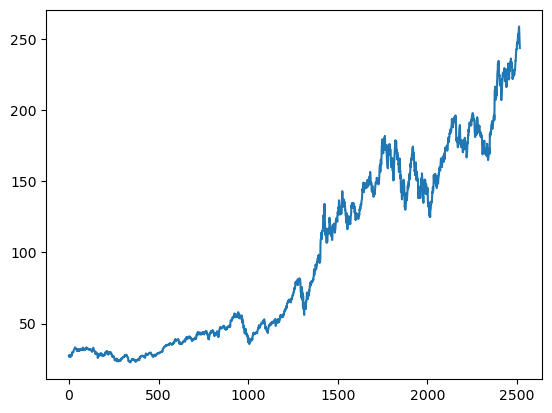

In [12]:
plt.plot(df.Close)

In [13]:
df.head()

Price,Close,High,Low,Open,Volume
0,27.332500,27.860001,26.837500,27.847500,212818400
1,26.562500,27.162500,26.352501,27.072500,257142000
2,26.565001,26.857500,26.157499,26.635000,263188400
3,26.937500,27.049999,26.674999,26.799999,160423600
4,27.972500,28.037500,27.174999,27.307501,237458000


In [14]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2512    230.2878
2513    230.7714
2514    231.1952
2515    231.5663
2516    231.8424
Name: Close, Length: 2517, dtype: float64

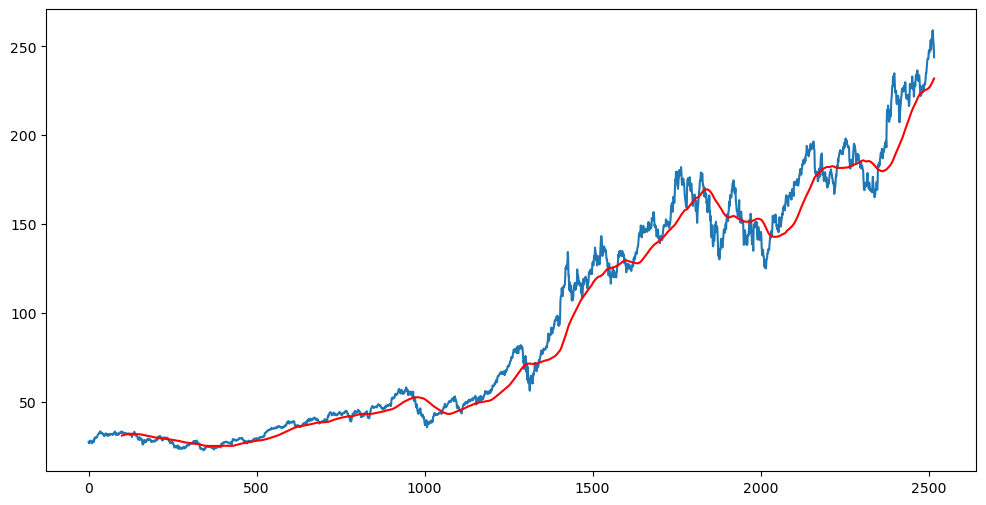

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [16]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    212.20125
2513    212.62355
2514    213.01955
2515    213.40855
2516    213.75920
Name: Close, Length: 2517, dtype: float64

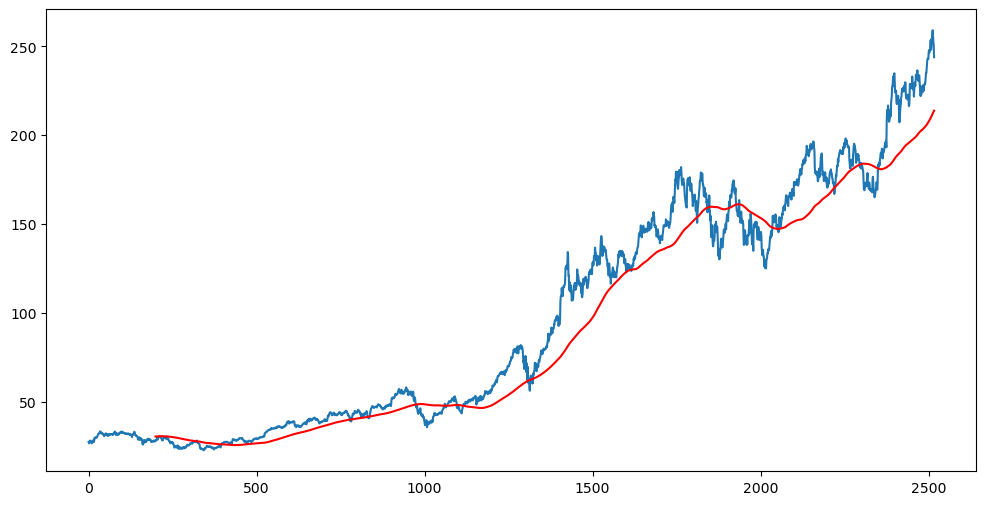

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'r')

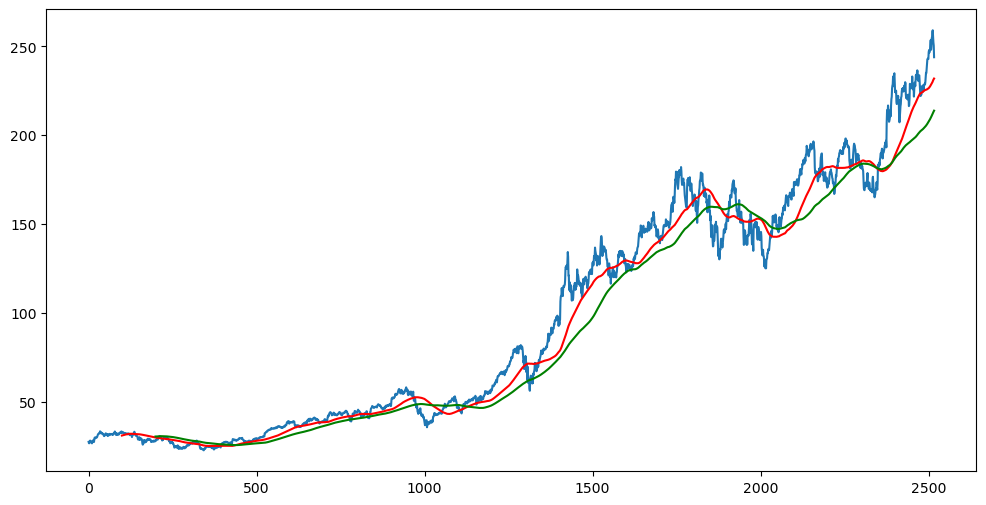

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [19]:
df.shape

(2517, 5)

# Splitting data into Training and Testing 

In [23]:
data_training =pd.DataFrame (df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame (df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [24]:
data_training.head()

,Close
0,27.332500
1,26.562500
2,26.565001
3,26.937500
4,27.972500


In [25]:
data_testing.head()

,Close
1761,178.199997
1762,177.570007
1763,182.009995
1764,179.699997
1765,174.919998


# Scaling of Data

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [27]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.03009605],
       [0.02521475],
       [0.0252306 ],
       ...,
       [1.        ],
       [0.99340703],
       [0.99397764]])

In [28]:
data_training_array.shape

(1761, 1)

In [29]:
#Training data 
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

# x_train
    
x_train,y_train= np.array(x_train),np.array(y_train)

In [30]:
x_train.shape

(1661, 100, 1)

# LSTM Model

In [31]:
!pip install keras

In [32]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [33]:
model=  Sequential()
model.add(LSTM(units=50,activation ='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation ='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation ='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam',loss= 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 40s 336ms/step - loss: 0.0622
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 332ms/step - loss: 0.0067
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 331ms/step - loss: 0.0052
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 331ms/step - loss: 0.0052
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 342ms/step - loss: 0.0047
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 340ms/step - loss: 0.0036
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 328ms/step - loss: 0.0045
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 329ms/step - loss: 0.0034
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 346ms/step - loss: 0.0026
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 329ms/step - loss: 0.0033
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 331ms/step - loss: 0.0038
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 330ms/step - loss: 0.0031
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 331ms/step - loss: 0.0033
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 355ms/step - loss: 0.0028
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 

In [37]:
# model.save('keras_model.h5')

In [5]:
# model.save('my_model.keras')

# Prediction Using Test Data

In [38]:
data_testing.head()

,Close
1761,178.199997
1762,177.570007
1763,182.009995
1764,179.699997
1765,174.919998


In [39]:
data_training.tail(100)

,Close
1661,146.089996
1662,145.600006
1663,145.860001
1664,148.889999
1665,149.100006
...,...
1756,175.639999
1757,176.279999
1758,180.330002
1759,179.289993


In [41]:
past_100_days= data_training.tail(100)

In [42]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df.head()

,Close
0,146.089996
1,145.600006
2,145.860001
3,148.889999
4,149.100006


In [43]:
input_data= scaler.fit_transform(final_df)
input_data

array([[1.57238813e-01],
       [1.53582169e-01],
       [1.55522427e-01],
       [1.78134359e-01],
       [1.79701573e-01],
       [1.94776119e-01],
       [1.87835875e-01],
       [1.59253770e-01],
       [1.61791056e-01],
       [1.72910501e-01],
       [1.84253817e-01],
       [1.83582089e-01],
       [1.74179144e-01],
       [1.68059686e-01],
       [1.75970230e-01],
       [2.09701493e-01],
       [2.00074677e-01],
       [2.05149249e-01],
       [2.13656708e-01],
       [2.18507523e-01],
       [2.36343340e-01],
       [2.24552281e-01],
       [2.16791137e-01],
       [1.78731388e-01],
       [1.83059760e-01],
       [1.72388058e-01],
       [1.79179131e-01],
       [1.77388045e-01],
       [1.57014941e-01],
       [1.33731394e-01],
       [1.37388038e-01],
       [1.55447841e-01],
       [1.62761242e-01],
       [1.63432857e-01],
       [1.51865669e-01],
       [1.26044836e-01],
       [1.32910494e-01],
       [1.22985107e-01],
       [1.31567151e-01],
       [1.05373161e-01],


In [44]:
input_data.shape

(856, 1)

In [45]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

# x_train
    
x_test,y_test= np.array(x_test),np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


# Making Predictions

In [46]:
y_predicted= model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step


In [47]:
y_predicted.shape

(756, 1)

In [48]:
y_test

array([3.96865697e-01, 3.92164281e-01, 4.25298516e-01, 4.08059727e-01,
       3.72388092e-01, 3.50597060e-01, 3.51865703e-01, 3.52014989e-01,
       3.73582150e-01, 3.76940336e-01, 3.52014989e-01, 3.58582190e-01,
       3.34179171e-01, 3.07537324e-01, 2.94701493e-01, 2.79029919e-01,
       2.73134333e-01, 2.59403016e-01, 2.58731401e-01, 2.55223929e-01,
       3.38134386e-01, 3.71343321e-01, 3.70074678e-01, 3.79253751e-01,
       3.57313433e-01, 3.53507503e-01, 3.48059774e-01, 3.71716478e-01,
       3.82537351e-01, 3.51492546e-01, 3.25522427e-01, 3.27313513e-01,
       3.56492533e-01, 3.54701561e-01, 3.27313513e-01, 3.15522454e-01,
       2.93283678e-01, 2.61567259e-01, 2.81492619e-01, 2.97238893e-01,
       2.99253737e-01, 2.84925392e-01, 3.10000024e-01, 3.07537324e-01,
       2.84701520e-01, 2.55820958e-01, 2.41940356e-01, 2.83059720e-01,
       2.50000071e-01, 2.21716424e-01, 1.91044776e-01, 2.24402996e-01,
       2.57985087e-01, 2.65671646e-01, 2.90746278e-01, 3.01194108e-01,
      

In [49]:
y_predicted

array([[0.40147948],
       [0.4050675 ],
       [0.4091342 ],
       [0.41366237],
       [0.41842198],
       [0.42260763],
       [0.42521554],
       [0.4256937 ],
       [0.4239632 ],
       [0.42049906],
       [0.41603988],
       [0.4109642 ],
       [0.4056607 ],
       [0.4001239 ],
       [0.3940369 ],
       [0.38705856],
       [0.37896407],
       [0.36988705],
       [0.3600778 ],
       [0.3499237 ],
       [0.33986208],
       [0.33074015],
       [0.32381493],
       [0.32017332],
       [0.32058167],
       [0.32487914],
       [0.33220723],
       [0.3410658 ],
       [0.3505504 ],
       [0.3601836 ],
       [0.36918294],
       [0.3764607 ],
       [0.38123143],
       [0.3837083 ],
       [0.38441873],
       [0.38354498],
       [0.38114655],
       [0.3770823 ],
       [0.37117088],
       [0.36376134],
       [0.35552222],
       [0.34714502],
       [0.33913073],
       [0.33208358],
       [0.32643655],
       [0.32214403],
       [0.31871784],
       [0.315

In [50]:
scaler.scale_

array([0.00746269])

In [51]:
scale_factor=1/0.00746269
y_predicted= y_predicted*scale_factor
y_test=y_test*scale_factor

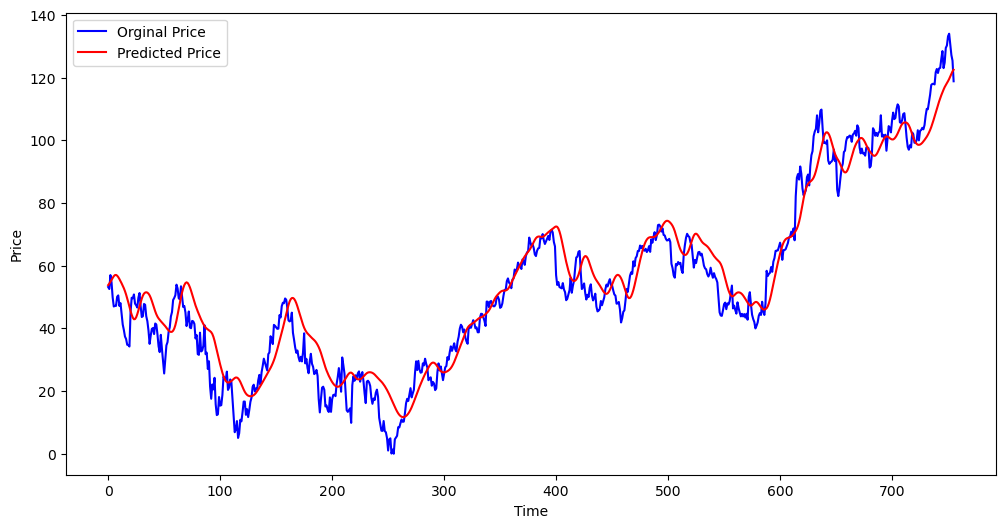

In [52]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label= 'Orginal Price')
plt.plot(y_predicted,'r',label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()